In [14]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Load the TSV file
df = pd.read_csv("S:/AI and Business/restaurant review analysis/Restaurant_Reviews.tsv", sep="\t")

# Display the first few rows
print(df.head())

df.info()
df.head()
df.isnull().sum()
df.describe()

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [16]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters & numbers
    return text

df["clean_text"] = df["Review"].astype(str).apply(clean_text)  # Replace "text_column" with actual column name

stop_words = set(stopwords.words("english"))

df["Review"] = df["Review"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

lemmatizer = WordNetLemmatizer()

df["clean_text"] = df["clean_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


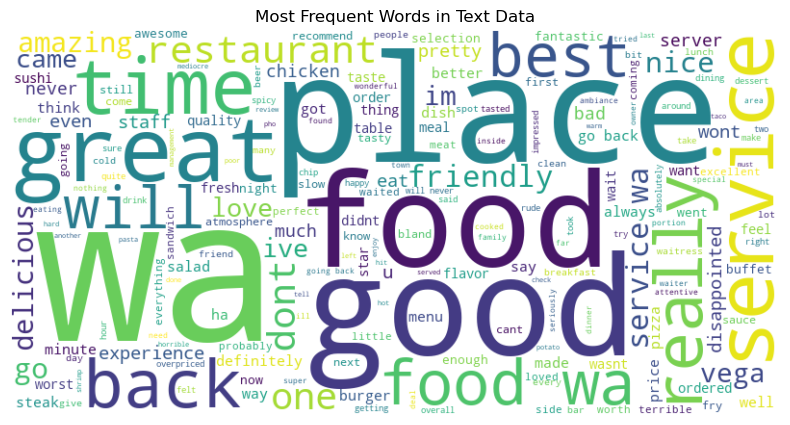

C:\Users\shiva\AppData\Local\Temp\ipykernel_28044\1280354864.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=common_words, palette="viridis")


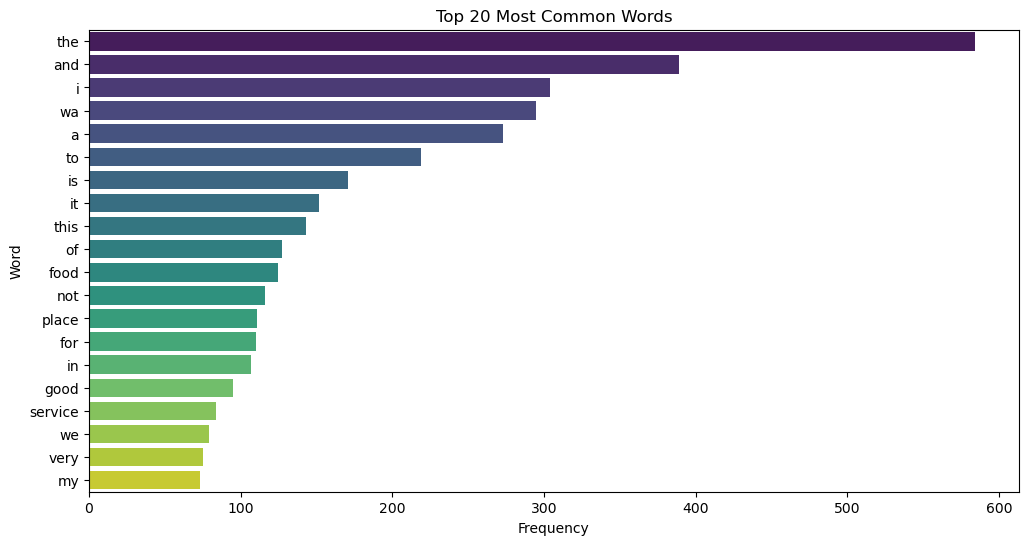

C:\Users\shiva\AppData\Local\Temp\ipykernel_28044\1280354864.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette=["green", "red", "blue"])


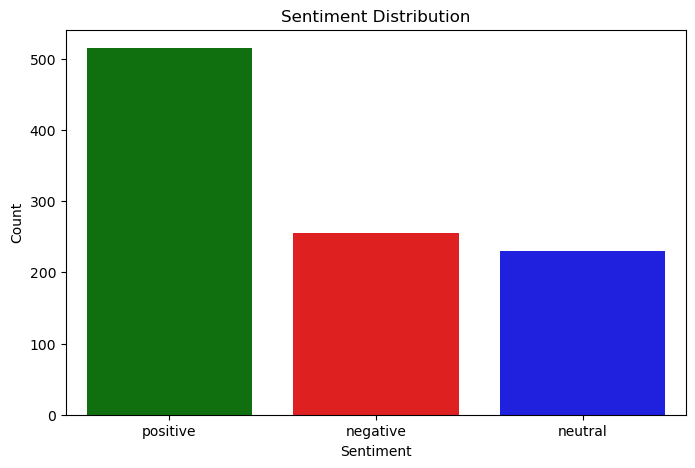

In [21]:
text = " ".join(df["clean_text"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Text Data")
plt.show()

words = df["clean_text"].str.split().explode()  # Tokenization

# Count most common words
word_freq = Counter(words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=["Word", "Frequency"])

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="Frequency", y="Word", data=common_words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.show()

# Calculate sentiment polarity using TextBlob
df["polarity"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment as Positive, Negative, or Neutral
df["sentiment"] = df["polarity"].apply(lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral"))

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["sentiment"], palette=["green", "red", "blue"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [23]:
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust number of features as needed
X = vectorizer.fit_transform(df["clean_text"])

print("Shape of TF-IDF matrix:", X.shape)  # Check shape of transformed data



Shape of TF-IDF matrix: (1000, 1000)
